In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



In [2]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [8]:
#Basic dataset info

print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())

df_desc = df.drop(columns=['id']) if 'id' in df.columns else df.copy()
print("\nDescriptive statistics:\n", df_desc.describe(include='all'))


Shape of dataset: (5110, 12)

Data types:
 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Missing values per column:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Descriptive statistics:
         gender          age  hypertension  heart_disease ever_married  \
count     5110  5110.000000   5110.000000    5110.000000         5110   
unique       3          NaN           NaN            NaN            2   
top     

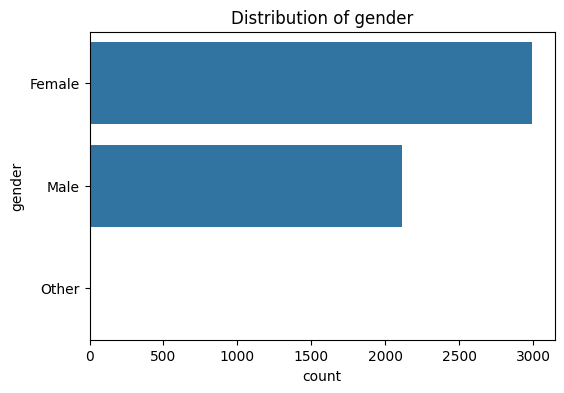

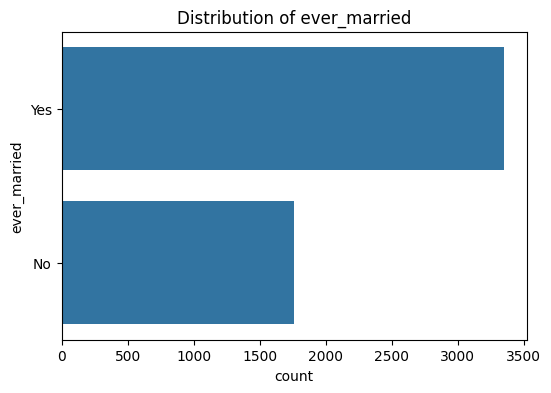

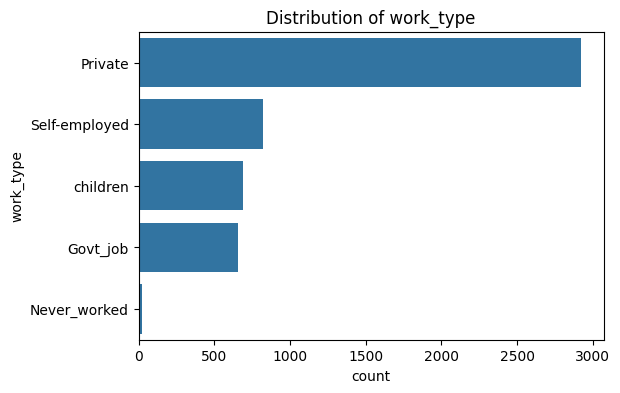

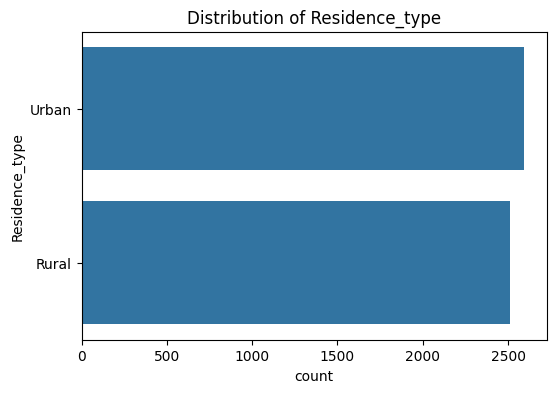

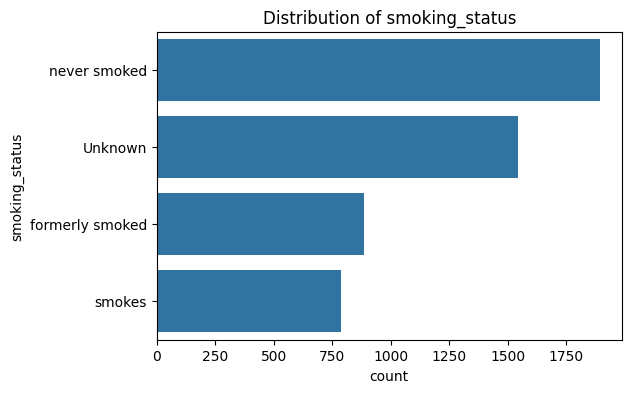

In [9]:
 # Categorical features count plots

cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

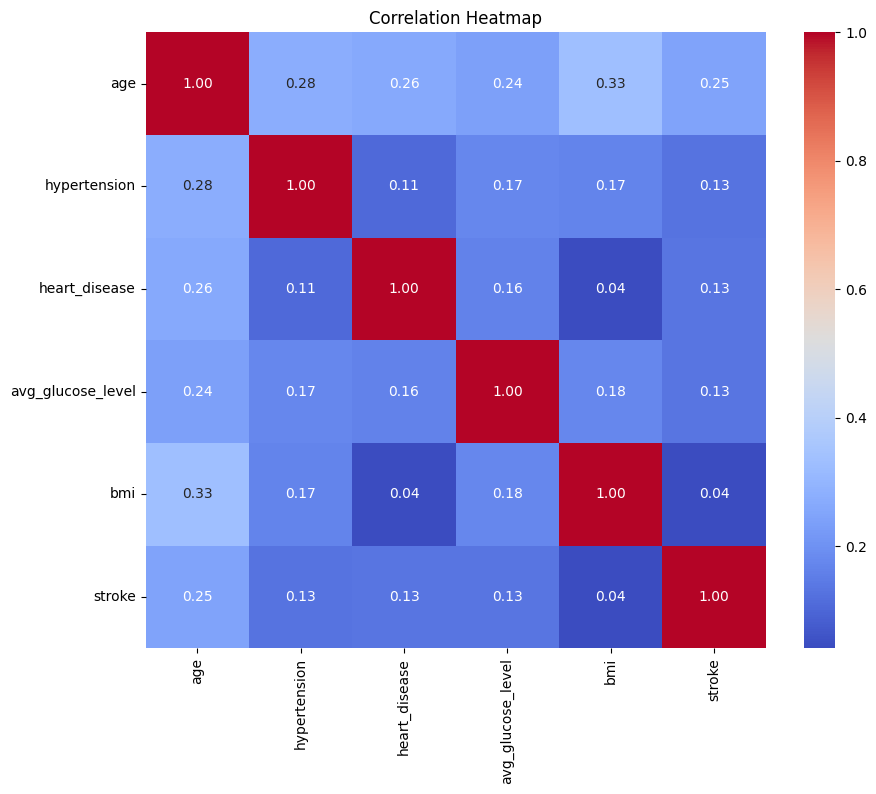

In [17]:
#Correlation heatmap (numerical)

plt.figure(figsize=(10,8))
target_col = 'stroke'

df_corr = df.drop(columns=['id']) if 'id' in df.columns else df.copy()


num_cols = df_corr.select_dtypes(include=np.number).columns.tolist()
if target_col not in num_cols:
    num_cols.append(target_col)

corr = df_corr[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


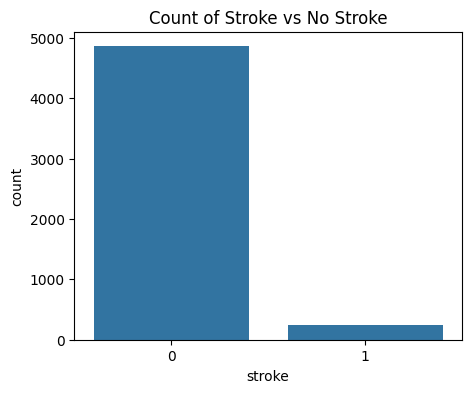

Stroke Ratio (%):
 stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


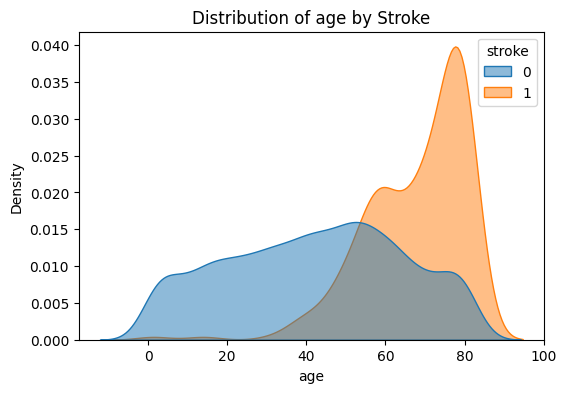

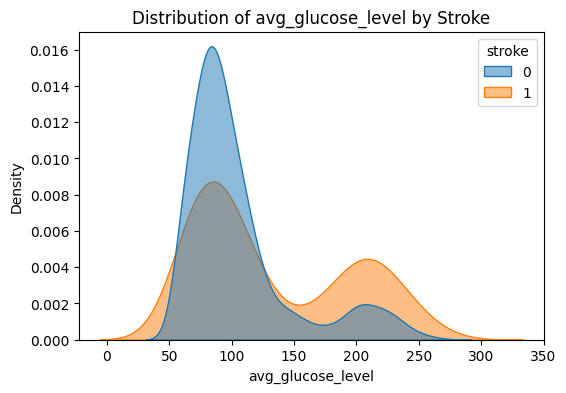

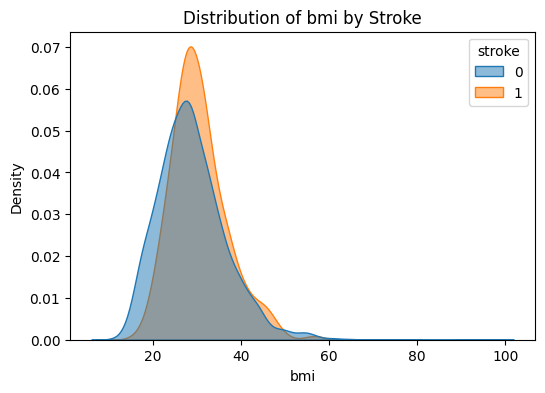

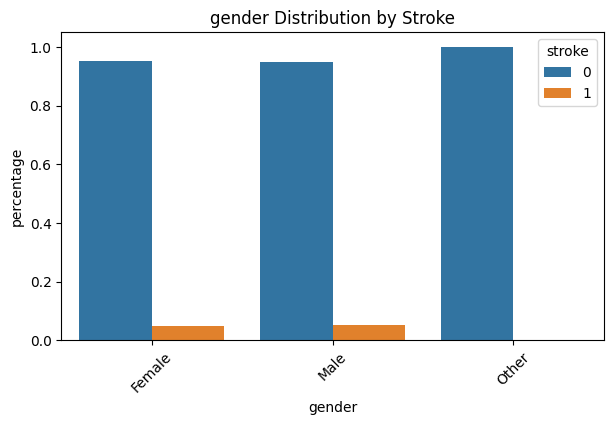

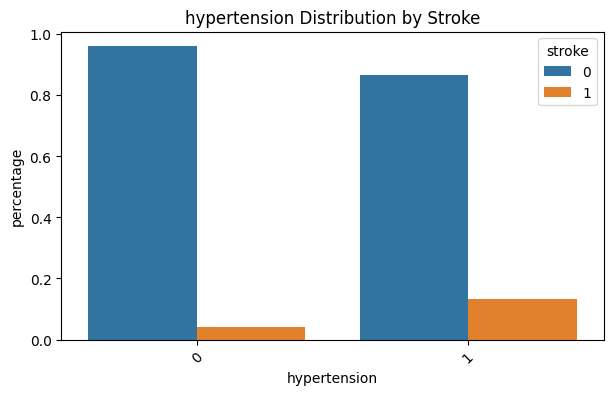

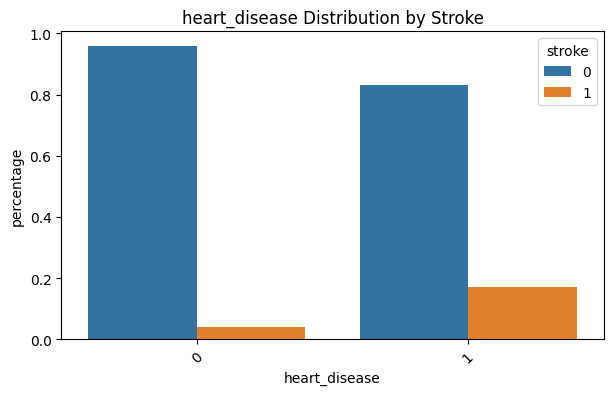

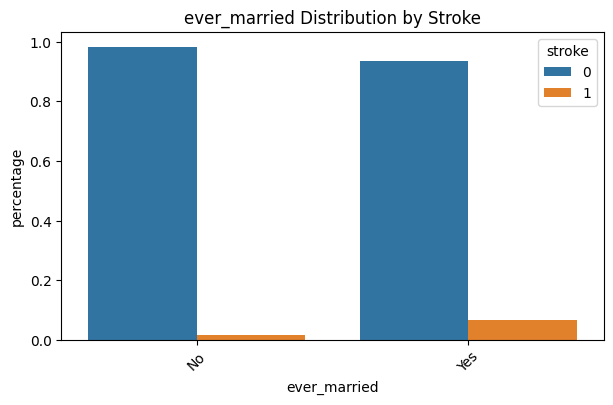

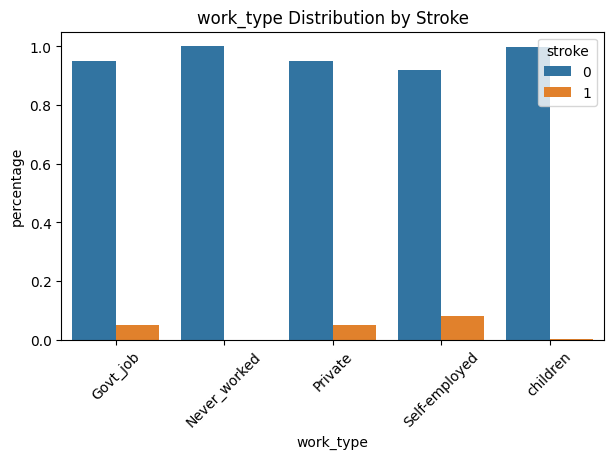

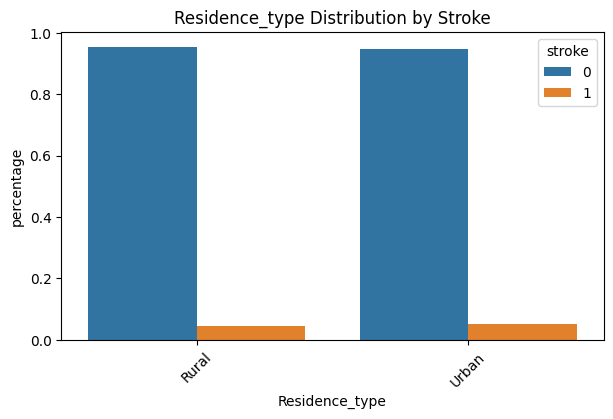

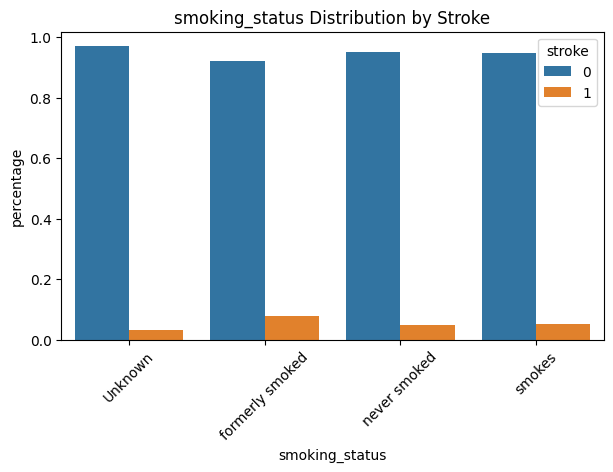

In [21]:
# Target Variable Analysis
plt.figure(figsize=(5,4))
sns.countplot(x=target_col, data=df)
plt.title("Count of Stroke vs No Stroke")
plt.show()


stroke_ratio = df[target_col].value_counts(normalize=True) * 100
print("Stroke Ratio (%):\n", stroke_ratio)

categorical_features = df.select_dtypes(exclude=['float64']).columns.tolist()
if 'id' in categorical_features:
    categorical_features.remove('id')
categorical_features.remove(target_col)


for col in ['heart_disease', 'hypertension']:
    if col not in categorical_features:
        categorical_features.append(col)


numeric_features = [col for col in df.columns if col not in categorical_features + [target_col] + ['id']]


for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue=target_col, fill=True, common_norm=False, alpha=0.5)
    plt.title(f"Distribution of {col} by Stroke")
    plt.show()


for col in categorical_features:
    plt.figure(figsize=(7,4))
    cat_percent = (df.groupby(col)[target_col]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .reset_index())
    sns.barplot(x=col, y='percentage', hue=target_col, data=cat_percent)
    plt.title(f"{col} Distribution by Stroke")
    plt.xticks(rotation=45)
    plt.show()

In [22]:
#  Train-Test Split
# ============================
# Drop ID column if it exists
if 'id' in df.columns:
    df = df.drop(columns=['id'])

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (4088, 10)
Test set shape: (1022, 10)

Target distribution in Train set:
 stroke
0    0.951321
1    0.048679
Name: proportion, dtype: float64

Target distribution in Test set:
 stroke
0    0.951076
1    0.048924
Name: proportion, dtype: float64
